In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
def classification_metrics(target, pred):
    tn, fp, fn, tp = metrics.confusion_matrix(target, pred).ravel()
    acc = (tn + tp) / (tn + fp +fn + tp)
    sen = tp / (tp + fn)
    spc = tn / (tn + fp)
    prc = tp / (tp + fp)
    return acc, sen, spc, prc

In [4]:
data = load_breast_cancer()
X, y = data['data'], data['target']

In [5]:
X_norm = (X - X.mean(axis=0)) / X.std(axis=0)

In [6]:
n_repeat = 100
result_df = pd.DataFrame(columns=['acc', 'sen', 'spc', 'prc'])

for i in range(n_repeat):
    
    # Split train and test data
    X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.2)
    
    # Train the model
    model = RandomForestClassifier()
    model.fit(X_train, y_train)
    
    # Test the model
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    acc, sen, spc, prc = classification_metrics(y_test, y_pred)

    # Add to the dataframe
    result_df.loc[len(result_df)] = [acc, sen, spc, prc]

In [7]:
result_df

,acc,sen,spc,prc
0,0.982456,0.974684,1.0,1.0


In [8]:
result_df.mean()

acc    0.982456
sen    0.974684
spc    1.000000
prc    1.000000
dtype: float64

In [9]:
result_df.std()

acc   NaN
sen   NaN
spc   NaN
prc   NaN
dtype: float64

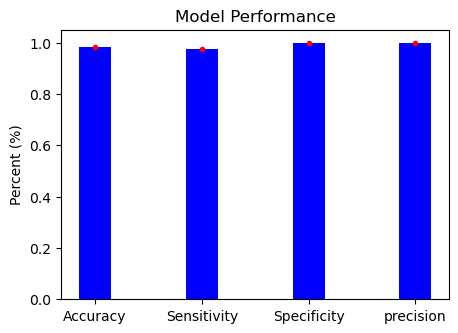

In [10]:
x = np.array(["Accuracy", "Sensitivity", "Specificity", "precision"])
y = np.array(result_df.mean())
s = np.array(result_df.std())

fig, ax = plt.subplots(figsize=(5, 3.5)) 
plt.bar(x, y, width = 0.3, color = 'b')
ax.errorbar(x, y, yerr=s, fmt='.', color='r', capsize=5)

plt.ylabel("Percent (%)")
plt.title("Model Performance")
plt.show()

In [15]:
model.feature_importances_

array([0.02218663, 0.01636905, 0.05070025, 0.04429366, 0.00493498,
       0.01556567, 0.02065469, 0.14164236, 0.00409556, 0.00628608,
       0.02094083, 0.00437923, 0.00594588, 0.02215565, 0.00375124,
       0.00468173, 0.01064827, 0.00939591, 0.00443189, 0.00476395,
       0.11839161, 0.02027317, 0.14182802, 0.0949893 , 0.01133552,
       0.01421723, 0.03155729, 0.1353713 , 0.00823784, 0.00597522])

In [16]:
fi = model.feature_importances_

In [26]:
np.argsort(fi)

array([14,  8, 11, 18, 15, 19,  4, 12, 29,  9, 28, 17, 16, 24, 25,  5,  1,
       21,  6, 10, 13,  0, 26,  3,  2, 23, 20, 27,  7, 22])

In [53]:
fi

array([0.02218663, 0.01636905, 0.05070025, 0.04429366, 0.00493498,
       0.01556567, 0.02065469, 0.14164236, 0.00409556, 0.00628608,
       0.02094083, 0.00437923, 0.00594588, 0.02215565, 0.00375124,
       0.00468173, 0.01064827, 0.00939591, 0.00443189, 0.00476395,
       0.11839161, 0.02027317, 0.14182802, 0.0949893 , 0.01133552,
       0.01421723, 0.03155729, 0.1353713 , 0.00823784, 0.00597522])

In [66]:
np.argsort(fi)[-1:-6:-1]

array([22,  7, 27, 20, 23])

In [65]:
np.argsort(-fi)[0:5]

array([22,  7, 27, 20, 23])